<a href="https://colab.research.google.com/github/tiassap/metrology/blob/main/Flatness_calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flatness calculator

Flatness calculator based on least squares reference plane method (LSPL).
 
https://remotelab.fe.up.pt/planesa/assets/Flatness_fundamentals.pdf

In [7]:
import numpy as np
import scipy.linalg as la

data_folder = 'sample_data'
data_file = 'flatness.csv' 

In [8]:
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm

In [9]:
points = np.genfromtxt(data_folder + '/' + data_file, delimiter=',',skip_header =1)

In [10]:
points

array([[-42.  ,   0.  ,  -1.56],
       [ 42.  ,   0.  ,  -0.75],
       [  0.  , -42.  ,   0.64],
       [  0.  ,  42.  ,  -2.69],
       [-42.  ,   0.  ,  -1.42],
       [ 42.  ,   0.  ,  -0.39],
       [  0.  , -42.  ,   0.59],
       [  0.  ,  42.  ,  -2.39],
       [-42.  ,   0.  ,  -1.39],
       [ 42.  ,   0.  ,  -0.54],
       [  0.  , -42.  ,   0.66],
       [  0.  ,  42.  ,  -2.58]])

In [11]:
class coordinate(object):
  """
  Calculate flatness of a surface plane from measurement points (by CMM)
  using the least squares reference plane method (LSPL).

  https://remotelab.fe.up.pt/planesa/assets/Flatness_fundamentals.pdf


  Input
  -----
  points: csv file -- header row: X, Y, Z (to be omitted)
          coordinates of measurement points
  """

  def __init__(self, points):
    self.x = np.array([ar[0] for ar in points])
    self.y = np.array([ar[1] for ar in points])
    self.z = np.array([ar[2] for ar in points])
    self.n = self.z.shape[0] # number of points

    # assign initial value
    self.theta_0 = 3 
    self.theta_1 = 3
    self.theta_2 = 3

    self.flatness = 'not calculated yet!'
   

  def distToPlane(self):
    return self.theta_1 * self.x + self.theta_2 * self.y + self.theta_0 - self.z / (self.theta_1**2 + self.theta_2**2 + 1**2)**0.5

  def regression(self):
    return self.theta_1 * self.x + self.theta_2 * self.y + self.theta_0

  #def gradient_descent_step_dist(self):
    #z_predicted = regression(self)

  def solve_theta(self):
    """
    equation A*theta = B
    theta = [theta_1, theta_2, theta_0]

    """
    
    A = np.array([
        [(self.x**2).sum(), (self.x*self.y).sum(), (self.x).sum()],
        [(self.x*self.y).sum(), (self.y**2).sum(), (self.y).sum()],
        [(self.x).sum(), (self.y).sum(), self.n]        
    ])

    B = np.array([
        [(self.x).sum()], 
        [(self.y*self.z).sum()], 
        [(self.z).sum()]
    ])

    theta = la.solve(A, B)
    return tuple(theta.reshape(1, -1)[0])

  def calc_flatness(self):
    self.theta_1, self.theta_2, self.theta_0 = self.solve_theta()
    z_predict = self.regression() 
    #self.flatness = abs((z_predict - self.z).max()) + abs((z_predict - self.z).min())
    self.flatness = abs(self.distToPlane().max()) + abs(self.distToPlane().min())
    print("flatness calculated: ", self.flatness)

  def plot(self):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xs = self.x
    ys = self.y
    zs = self.z
    ax.scatter(xs, ys, zs, marker='o')

    X = np.arange(-50, 50, 1)
    Y = np.arange(-50, 50, 1)
    X, Y = np.meshgrid(X, 
                       Y)
    
    Z = self.theta_1 * X + self.theta_2 * Y + self.theta_0
    ax.plot_surface(X, Y, Z, color='purple', alpha=0.1, linewidth=0, antialiased=False)
    ax.plot_surface(X, Y, X*0, color='blue', alpha=0.05, linewidth=0, antialiased=False)
    # reference: https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()






In [12]:
measPoints_1 = coordinate(points)

In [13]:
measPoints_1.flatness

'not calculated yet!'

In [14]:
measPoints_1.calc_flatness()

flatness calculated:  1.169160744791892


Visualize the coordinate points and the reference plane.

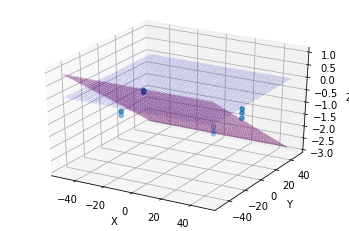

In [15]:
measPoints_1.plot()